### This is for automatically plot average glue layer thickness vs. modules

Averaging across measurement locations and taking the standard deviation as the uncertainty on that average

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
str_filename = 'SM measurements.csv'
# str_filename = 'Test_472-024-046.csv'

In [3]:
df = pd.read_csv(str_filename)
# df

Calculate glue layer thicknesses at four different positions

In [4]:
df['GL1'] = df.module_p1 - df.LYSO_p1 - df.SiPM1_p1 - df.SiPM2_p4
df['GL2'] = df.module_p2 - df.LYSO_p2 - df.SiPM1_p2 - df.SiPM2_p3
df['GL3'] = df.module_p3 - df.LYSO_p3 - df.SiPM1_p3 - df.SiPM2_p2
df['GL4'] = df.module_p4 - df.LYSO_p4 - df.SiPM1_p4 - df.SiPM2_p1

Calculate average glue layer thickness for each module, regardless of people of measurement

In [5]:
df_G0 = df.groupby("id")[["GL1","GL2","GL3","GL4"]].mean()*1000      #Convert from mm to μm
df_G0['GL_avg'] = df_G0.mean(1)
df_G0['GL_std'] = df_G0.std(1)
# df_G0

In [6]:
# GL_id = df_G0["id"].values
GL_avg = df_G0["GL_avg"].values
GL_std = df_G0["GL_std"].values
GL_id = list(df_G0.T.columns)
# GL_id

Plot

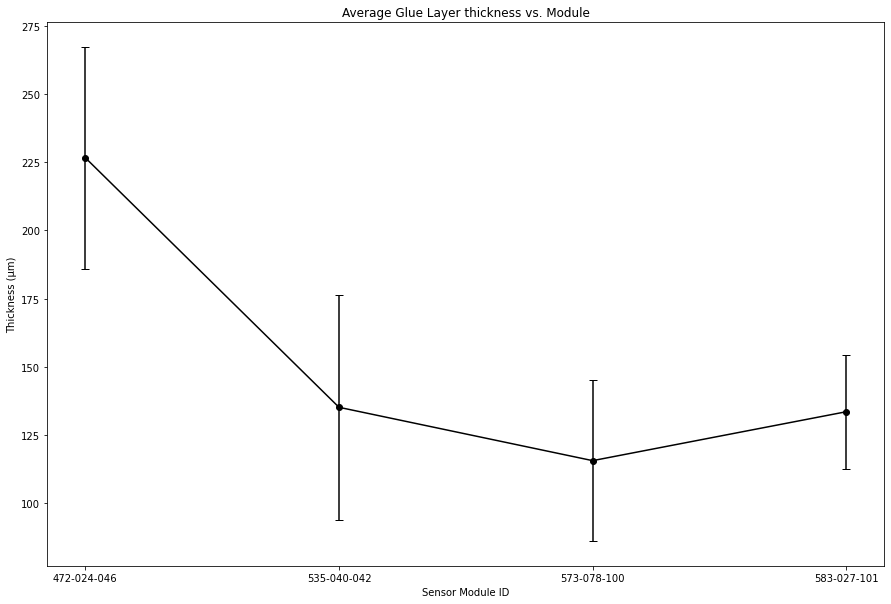

In [7]:
fig = plt.figure(figsize=(15,10))
plt.plot(GL_id, GL_avg, color='black')
plt.errorbar(GL_id, GL_avg, yerr = GL_std, fmt = 'o', capsize=4, color='black')
plt.title("Average Glue Layer thickness vs. Module")
plt.xlabel('Sensor Module ID')
plt.ylabel('Thickness (μm)')
plt.show()